In [1]:
import pandas as pd
from sklearn.metrics import roc_auc_score
import numpy as np

In [2]:
demand_bookings_df = pd.read_csv('./hotel_bookings.csv')
demand_bookings_df.rename(columns = {
    'adults': 'no_of_adults',
    'children': 'no_of_children',
    'stays_in_weekend_nights': 'no_of_weekend_nights',
    'stays_in_week_nights': 'no_of_week_nights',
    'meal': 'type_of_meal_plan',
    'required_car_parking_spaces': 'required_car_parking_space',
    'reserved_room_type': 'room_type_reserved',
    'lead_time': 'lead_time',
    'arrival_date_year': 'arrival_year',
    'arrival_date_month': 'arrival_month',
    'arrival_date_day_of_month': 'arrival_date',
    'market_segment': 'market_segment_type',
    'is_repeated_guest': 'repeated_guest',
    'previous_cancellations': 'no_of_previous_cancellations',
    'previous_bookings_not_canceled': 'no_of_previous_bookings_not_canceled',
    'adr': 'avg_price_per_room',
    'total_of_special_requests': 'no_of_special_requests',
    'is_canceled': 'booking_status'
}, inplace=True)

demand_bookings_df['arrival_month'] = demand_bookings_df['arrival_month'].map({
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
})

demand_bookings_df['type_of_meal_plan'] = \
    demand_bookings_df['type_of_meal_plan'].map({
        'BB': 0, 'HB': 2, 'SC': 1, 'Undefined': 1, 'FB': 3
    })

demand_bookings_df['market_segment_type'] = \
    demand_bookings_df['market_segment_type'].map({
        "'Online TA": 1, "Offline TA/TO": 0, "Corporate": 2, "Complementary": 4, "Aviation": 3
    })

demand_bookings_df['room_type_reserved'] = \
    demand_bookings_df['room_type_reserved'].map({
        'A':  0, 'D':  1, 'E':  3, 'F':  2, 'G':  4, 'B':  5, 'C':  6
    })

demand_bookings_df['market_segment_type'].fillna(5, inplace=True)
demand_bookings_df['room_type_reserved'].fillna(7, inplace=True)

In [3]:
train = pd.read_csv('./train.csv').drop('id',axis=1)
cols = train.columns
origin = pd.read_csv('./archive/train__dataset.csv')
train = pd.concat([train,origin,demand_bookings_df],axis=0).drop_duplicates().reset_index(drop=True)
test = pd.read_csv('./test.csv').drop('id',axis=1)

In [4]:
train = train.loc[:,cols]
train

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0.0,0,2,1,0,0.0,9,2018,1,14,1.0,1,11,0,67.50,0,0
1,2,0.0,1,2,0,0,0.0,117,2018,7,29,0.0,0,0,0,72.25,0,0
2,2,0.0,0,1,0,0,0.0,315,2018,12,2,0.0,0,0,0,52.00,0,0
3,1,0.0,0,2,1,0,0.0,32,2018,12,1,1.0,0,0,0,56.00,0,0
4,2,0.0,1,0,0,0,0.0,258,2018,10,16,0.0,0,0,0,100.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141961,2,0.0,2,5,0,0,0.0,23,2017,8,30,0.0,0,0,0,96.14,0,0
141962,3,0.0,2,5,0,0,3.0,102,2017,8,31,5.0,0,0,0,225.43,2,0
141963,2,0.0,2,5,0,0,1.0,34,2017,8,31,5.0,0,0,0,157.71,4,0
141964,2,0.0,2,5,0,0,0.0,109,2017,8,31,5.0,0,0,0,104.40,0,0


<AxesSubplot: ylabel='Frequency'>

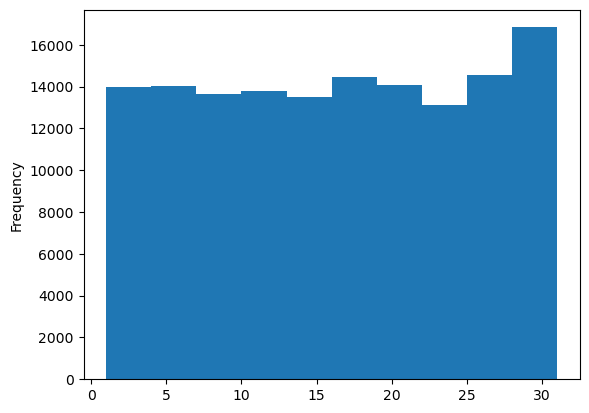

In [5]:
train.arrival_date.plot.hist()

In [6]:
drop_target = ['no_of_previous_cancellations','arrival_date','arrival_month','arrival_year']
train = train.drop(drop_target,axis=1)
test = test.drop(drop_target,axis=1)

In [7]:
train.booking_status.value_counts()

0    97982
1    43984
Name: booking_status, dtype: int64

In [8]:
from pycaret import classification
classification.setup(session_id=41,data=train,target='booking_status')

,Description,Value
0,session_id,41
1,Target,booking_status
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(141966, 14)"
5,Missing Values,True
6,Numeric Features,6
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


(41,
 None,
 {'lr': <pycaret.containers.models.classification.LogisticRegressionClassifierContainer at 0x27aa0033550>,
  'knn': <pycaret.containers.models.classification.KNeighborsClassifierContainer at 0x27aa0033b80>,
  'nb': <pycaret.containers.models.classification.GaussianNBClassifierContainer at 0x27aa00331c0>,
  'dt': <pycaret.containers.models.classification.DecisionTreeClassifierContainer at 0x27aa0006880>,
  'svm': <pycaret.containers.models.classification.SGDClassifierContainer at 0x27a9ffbf4f0>,
  'rbfsvm': <pycaret.containers.models.classification.SVCClassifierContainer at 0x27aa002dc70>,
  'gpc': <pycaret.containers.models.classification.GaussianProcessClassifierContainer at 0x27aa002d6d0>,
  'mlp': <pycaret.containers.models.classification.MLPClassifierContainer at 0x27aa002d5b0>,
  'ridge': <pycaret.containers.models.classification.RidgeClassifierContainer at 0x27a9ffb02e0>,
  'rf': <pycaret.containers.models.classification.RandomForestClassifierContainer at 0x27a9ffb0f4

In [9]:
best = classification.compare_models(sort='AUC',n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.7914,0.8402,0.5532,0.7122,0.6226,0.4816,0.4890,1.6270
catboost,CatBoost Classifier,0.7903,0.8395,0.5459,0.7129,0.6183,0.4772,0.4853,3.7810
lightgbm,Light Gradient Boosting Machine,0.7866,0.8340,0.5287,0.7112,0.6065,0.4644,0.4740,0.2170
gbc,Gradient Boosting Classifier,0.7773,0.8166,0.5041,0.6964,0.5848,0.4379,0.4486,1.5310
rf,Random Forest Classifier,0.7727,0.8151,0.5576,0.6593,0.6041,0.4463,0.4494,1.5630
ada,Ada Boost Classifier,0.7675,0.7992,0.4979,0.6700,0.5712,0.4164,0.4251,0.4570
et,Extra Trees Classifier,0.7574,0.7867,0.5446,0.6267,0.5827,0.4129,0.4149,1.9700
lr,Logistic Regression,0.7367,0.7599,0.3622,0.6348,0.4611,0.3037,0.3247,3.1110
lda,Linear Discriminant Analysis,0.7324,0.7562,0.3414,0.6290,0.4425,0.2862,0.3094,0.2990
knn,K Neighbors Classifier,0.7205,0.7258,0.4655,0.5612,0.5088,0.3158,0.3186,0.5110


In [10]:
best_tune = [classification.tune_model(i) for i in best]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7869,0.8399,0.5747,0.6888,0.6266,0.4792,0.4830
1,0.7914,0.8385,0.5805,0.6982,0.6339,0.4898,0.4939
2,0.7904,0.8398,0.5838,0.6940,0.6341,0.4888,0.4924
3,0.7909,0.8371,0.5695,0.7022,0.6289,0.4856,0.4907
4,0.7958,0.8436,0.5750,0.7132,0.6367,0.4970,0.5026
5,0.7806,0.8291,0.5560,0.6805,0.6120,0.4612,0.4658
6,0.7906,0.8386,0.5632,0.7043,0.6259,0.4830,0.4888
7,0.7880,0.8403,0.5687,0.6943,0.6253,0.4795,0.4841
8,0.7923,0.8392,0.5781,0.7016,0.6339,0.4908,0.4953


In [11]:
best_tune

[XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.9,
               enable_categorical=False, gamma=0, gpu_id=-1,
               importance_type=None, interaction_constraints='',
               learning_rate=0.001, max_delta_step=0, max_depth=4,
               min_child_weight=3, missing=nan, monotone_constraints='()',
               n_estimators=140, n_jobs=-1, num_parallel_tree=1,
               objective='binary:logistic', predictor='auto', random_state=41,
               reg_alpha=0.4, reg_lambda=0.5, scale_pos_weight=1.2,
               subsample=0.9, tree_method='auto', use_label_encoder=True,
               validate_parameters=1, verbosity=0),
 LGBMClassifier(bagging_fraction=0.7, bagging_freq=0, boosting_type='gbdt',
                class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
                importance_type='split', learning_rate=0.5, max_depth=-1,
                min_child_samples=100,

In [12]:
best_tune[0].get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.9,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.001,
 'max_delta_step': 0,
 'max_depth': 4,
 'min_child_weight': 3,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 140,
 'n_jobs': -1,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 41,
 'reg_alpha': 0.4,
 'reg_lambda': 0.5,
 'scale_pos_weight': 1.2,
 'subsample': 0.9,
 'tree_method': 'auto',
 'validate_parameters': 1,
 'verbosity': 0}

In [17]:
best_tune[1].get_params()

{'depth': 6,
 'l2_leaf_reg': 20,
 'border_count': 254,
 'verbose': False,
 'random_strength': 0.6,
 'task_type': 'CPU',
 'n_estimators': 90,
 'random_state': 41,
 'eta': 0.5}

In [18]:
import catboost
params = best_tune[1].get_params()
cat = catboost.CatBoostClassifier(**params)
cat.fit(train.drop('booking_status',axis=1),train['booking_status'])
proba_cat = cat.predict_proba(test)

In [15]:
import xgboost
params = best_tune[0].get_params()
xgb = xgboost.XGBClassifier(**params)
xgb.fit(train.drop('booking_status',axis=1),train['booking_status'])
proba_xgb = xgb.predict_proba(test)

In [19]:
import lightgbm
params = best_tune[2].get_params()
lgb = lightgbm.LGBMClassifier(**params)
lgb.fit(train.drop('booking_status',axis=1),train['booking_status'])
proba_lgb = lgb.predict_proba(test)

In [34]:
proba = [proba_cat,proba_xgb,proba_lgb]
proba = [[j[1] for j in i] for i in proba]

<BarContainer object of 13 artists>

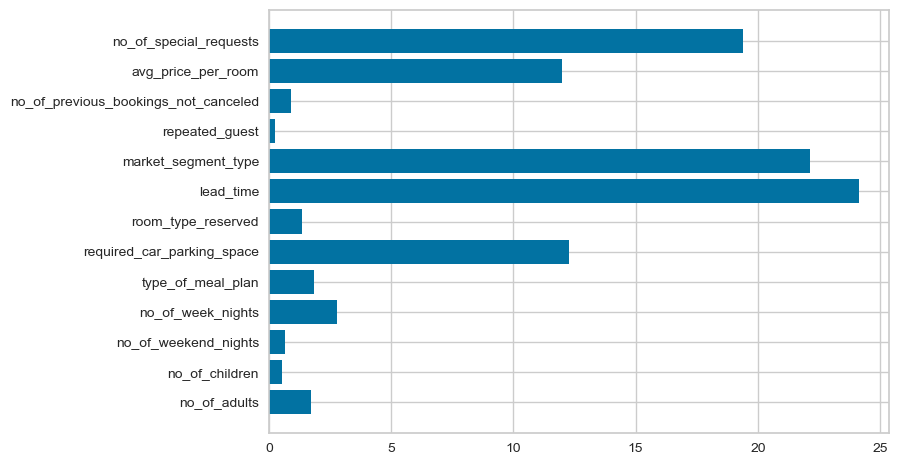

In [35]:
import matplotlib.pyplot as plt
plt.barh(cat.feature_names_,cat.feature_importances_)

<BarContainer object of 13 artists>

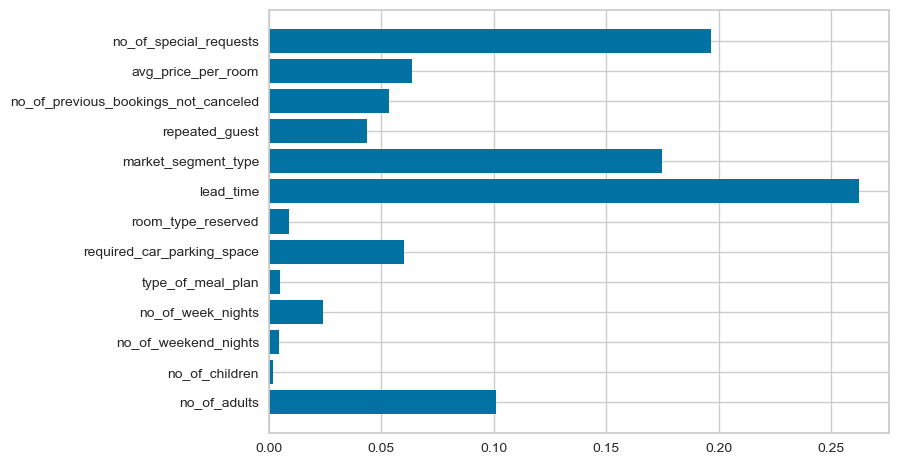

In [36]:
plt.barh(cat.feature_names_,xgb.feature_importances_)

<BarContainer object of 13 artists>

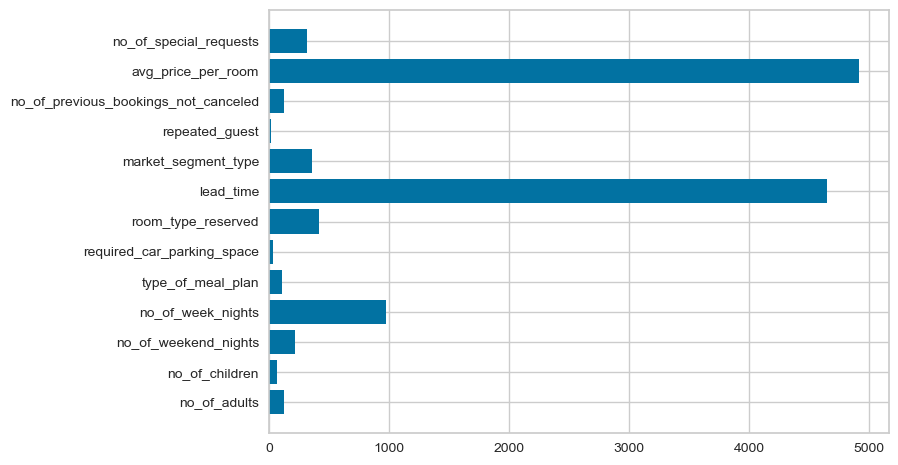

In [37]:
plt.barh(cat.feature_names_,lgb.feature_importances_)

In [51]:
sub = pd.read_csv('./sample_submission.csv')
sub['booking_status'] = np.array([proba[0],proba[2]]).mean(axis=0)# np.array(proba).mean(axis=0)
sub = sub.set_index('id')
sub.to_csv('./submission.csv')

In [52]:
sub

,booking_status
id,
42100,0.381777
42101,0.081002
42102,0.354708
42103,0.066907
42104,0.358491
...,...
70163,0.933756
70164,0.069438
70165,0.093688


<AxesSubplot: ylabel='Frequency'>

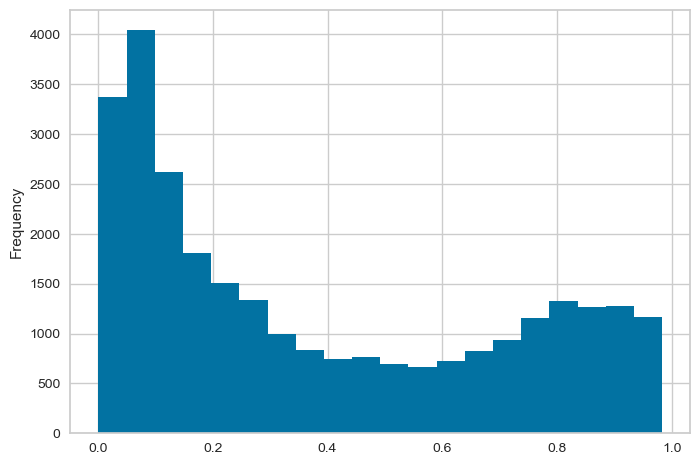

In [53]:
sub['booking_status'].plot.hist(bins=20)